In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def drop_columns(df, regex):
    return df.drop(columns=df.filter(regex=regex))

In [13]:
region = 'sr_wm_ref'
omit_extra_vars = True

In [40]:
rec_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/recovery-sleep-first2h-bandpower-unnormalized.csv')).replace({'recovery-sleep-first2h': 'recovery'})
#dep_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/extended-wake-last2h.csv')).replace({'extended-wake-last2h': 'deprivation'})
dep_df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/extended-wake-bandpower-unnormalized.csv')).replace({'extended-wake': 'deprivation'})

In [41]:
if omit_extra_vars:
    #rec_df = drop_columns(rec_df, 'theta|gamma')
    rec_df = drop_columns(rec_df, 'gamma|total')
    dep_df = drop_columns(dep_df, 'gamma|total')

In [42]:
df = pd.concat([rec_df, dep_df])
df = df.set_index('region').xs(region)
df = df.pivot(index='subject', columns='condition')
df.columns = df.columns.to_flat_index()
df = df.dropna(axis=1)
df

,"(mean_low_delta, deprivation)","(mean_low_delta, recovery)","(mean_delta, deprivation)","(mean_delta, recovery)","(mean_theta, deprivation)","(mean_theta, recovery)"
subject,,,,,,
Alessandro,46311.390015,128659.211425,172795.330467,563126.404857,173673.877253,321067.868186
Allan,53777.713704,91469.503587,190288.705221,370018.904211,111133.379976,186290.063393
Doppio,57512.691752,104875.663132,159759.211037,372960.793034,148468.997970,233467.907574
Segundo,74449.800923,197375.860766,182932.842417,508625.613302,230367.103531,368537.185111
Valentino,110318.638591,274715.920998,239242.592796,573600.239450,153836.271071,273831.467700


In [43]:
#x_vars = [col for col in df.columns if 'deprivation' in col[1]]
#y_vars = [col for col in df.columns if 'recovery' in col[1]]

#g = sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, diag_kind=None)

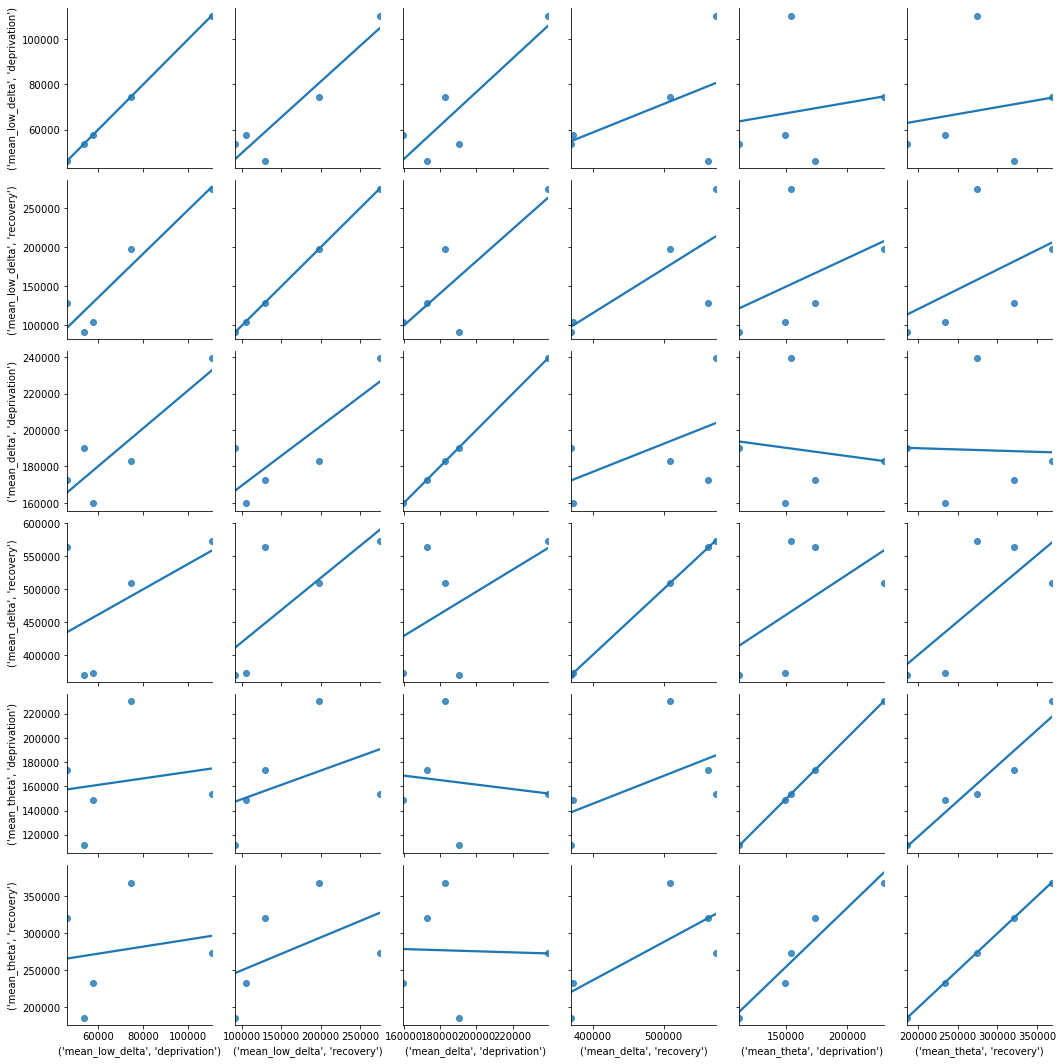

In [44]:
#sns.pairplot(df, x_vars=x_vars, y_vars=y_vars, diag_kind=None, kind='reg', plot_kws=dict(ci=None))
sns.pairplot(df, diag_kind=None, kind='reg', plot_kws=dict(ci=None))

In [45]:
corr = df.corr(method='pearson')
corr = corr.reindex(index=pd.MultiIndex.from_tuples(corr.index), columns=pd.MultiIndex.from_tuples(corr.columns))
#corr = corr.filter(regex='deprivation', axis=1).filter(regex='recovery', axis=0)
corr

mean_low_delta            mean_delta            \
                              deprivation  recovery deprivation  recovery   
mean_low_delta deprivation       1.000000  0.939735    0.879144  0.492301   
               recovery          0.939735  1.000000    0.817768  0.741651   
mean_delta     deprivation       0.879144  0.817768    1.000000  0.508434   
               recovery          0.492301  0.741651    0.508434  1.000000   
mean_theta     deprivation       0.157591  0.411751   -0.129033  0.527637   
               recovery          0.170681  0.471716   -0.031425  0.720703   

                            mean_theta            
                           deprivation  recovery  
mean_low_delta deprivation    0.157591  0.170681  
               recovery       0.411751  0.471716  
mean_delta     deprivation   -0.129033 -0.031425  
               recovery       0.527637  0.720703  
mean_theta     deprivation    1.000000  0.960524  
               recovery       0.960524  1.000000

[Text(0.5, 1.0, 'Pearson correlation coefficients'),
 Text(0.5, 14.09375, ''),
 Text(32.09374999999999, 0.5, '')]

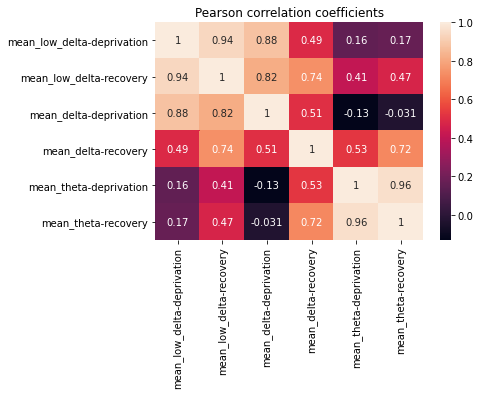

In [46]:
g = sns.heatmap(corr, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set(title='Pearson correlation coefficients', xlabel=None, ylabel=None)